In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
dataword = pd.read_csv('facedataen.csv')
datamain = pd.read_csv('maindata.csv')
datagoogle = pd.read_csv('googletrends.csv')

# Verisetlerine Bakış

https://trends.google.com/trends/?geo=US

In [3]:
datamain.head(10)

,Age,Emotion
0,18-35,Already Knowing. No Problem
1,14-18,Already Knowing. No Problem
2,18-35,Already Knowing. No Problem
3,18-35,Not interested
4,18-35,Not interested
5,18-35,Already Knowing. No Problem
6,18-35,I was angry
7,14-18,Already Knowing. No Problem
8,18-35,Not interested
9,18-35,I was angry


In [4]:
datagoogle.head(30)

,Day,Facebook data leak: (Worldwide)
0,2018-03-11,0
1,2018-03-12,0
2,2018-03-13,0
3,2018-03-14,0
4,2018-03-15,0
5,2018-03-16,0
6,2018-03-17,0
7,2018-03-18,6
8,2018-03-19,20
9,2018-03-20,55


In [119]:
dataword.head(10)

,Data,Angry
0,I was guessing something like this was not don...,0
1,I thought you did not do this for your good an...,1
2,it is unfair for companies to sell this data f...,1
3,There Was No Problem For Me,0
4,I do not use facebook,0
5,It's creepy to learn that Facebook sells our i...,1
6,I do not use Facebook. but every member is usi...,0
7,I do not care because I already know that all ...,0
8,I was already suspicious of such a possibility...,1
9,I'm not surprised,1


# Görselleştirme

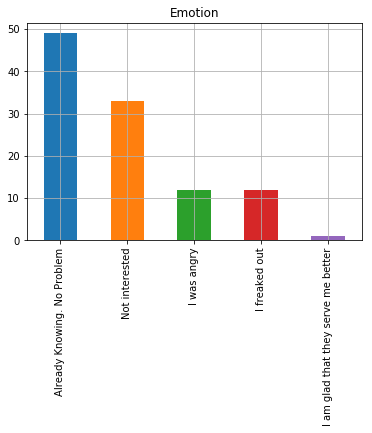

In [6]:
datamain['Emotion'].value_counts().plot(kind = 'bar')
plt.title("Emotion")
plt.grid()

Angry=True  % 38.23529411764706
Angry=False  % 61.76470588235294


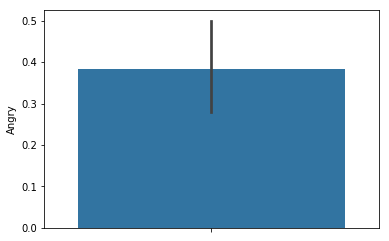

In [7]:
sns.barplot(y="Angry",data=dataword)

print('Angry=True  %',100*np.mean(dataword['Angry'][dataword['Angry']]==1.0))
print('Angry=False  %',100*np.mean(dataword['Angry'][dataword['Angry']]==0.0))

** Let's Look at Age Ratios  **

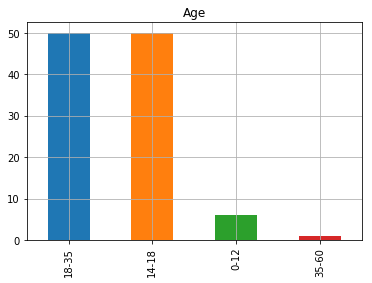

In [8]:
datamain['Age'].value_counts().plot(kind = 'bar')
plt.title("Age")
plt.grid()

** We'll now review our Google Trends Data **

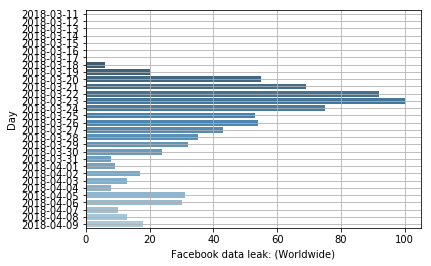

In [9]:
import seaborn as sns
sns.barplot(x="Facebook data leak: (Worldwide)", y="Day", data=datagoogle,  palette="Blues_d")
plt.grid()

# Text Mining

- datasetteki ilk satırı alıyorum.

In [11]:
dataset = pd.read_csv('facedataen.csv')
dataset['Data'][1]

'I thought you did not do this for your good and you use it against us.'

- ingilizce harfler dışındaki bütün herşeyi " " ile değiştiriyoruz.

In [14]:
review = re.sub('[^a-zA-Z]', ' ', dataset['Data'][1])
review2 = re.sub('[^a-zA-Z]', ' ', "AbC def @da.zi")
print(review," - - ", review2)

I thought you did not do this for your good and you use it against us   - -  AbC def  da zi


- bütün harfleri küçük hale getiriyoruz.

In [15]:
review = review.lower()
review

'i thought you did not do this for your good and you use it against us '

- cümledeki kelimeleri ayırıyoruz.

In [16]:
review = review.split()
review

['i',
 'thought',
 'you',
 'did',
 'not',
 'do',
 'this',
 'for',
 'your',
 'good',
 'and',
 'you',
 'use',
 'it',
 'against',
 'us']

- Bu kısımda PorterStemmer text mining için çok kullanılan porterstemmer'ı kullanıyorum. ve ardından bunun yardımıyla ingilizcedeki stopwordler örnek olarak "You, i, am, it" kelimelerini çıkartıyorum.

In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
ps = PorterStemmer()

In [19]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review

['thought', 'good', 'use', 'us']

In [20]:
review = ' '.join(review)
review

'thought good use us'

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('facedataen.csv')

# Cleaning the texts
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 68):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Data'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix

In [172]:
def new(text):
    corpus3 = ["dasdada","dsadasda","dasdasdas"]
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus3.append(review)
    test = cv.fit_transform(corpus3).toarray()
    test = test[3]
    test = test.reshape(-1,1)
    y_pred = classifier.predict(test)
    one = 0
    zero = 0
    for i in y_pred:
        if i == 1:
            one = one + 1
        elif i == 0:
            zero = zero + 1
    if zero > one:
        print("He is Angry")
    elif one > zero:
        print("He is not Angry")

In [173]:
new("i dont like")

He is Angry
